In [55]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [56]:
image = imageio.volread('IMG-0002-00001.dcm')

Reading DICOM (examining files): 1/7 files (14.3%7/7 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 2/2  (100.0%)


### Object's coordinates

In [57]:
xMin, yMin, xMax, yMax = 302, 316, 318, 334

## Plot to ensure that the object is really in the Region of Interest (ROI)

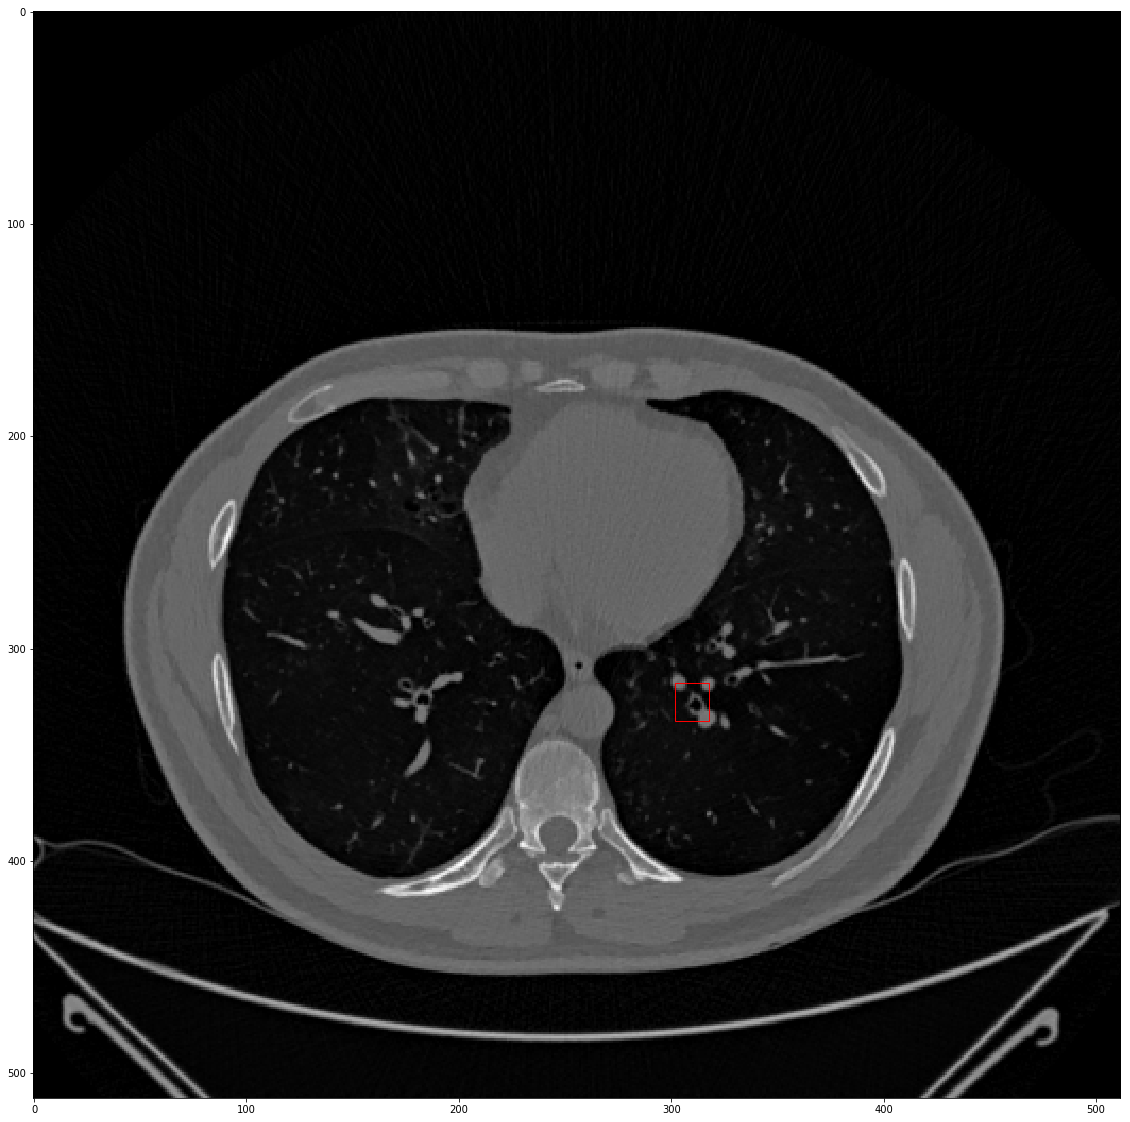

In [58]:
fig,ax = plt.subplots(1,figsize=(20,20))

ax.imshow(image[0], cmap='gray')

rect = patches.Rectangle((xMin,yMin),abs(xMin-xMax),abs(yMin - yMax),linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(rect)

plt.show()

## Создаю отдельный объект с регионом только нашего объекта

In [59]:
ROI = image[0][yMin:yMax+1, xMin:xMax+1]

In [60]:
ROI.shape

(19, 17)

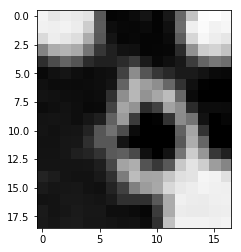

In [61]:
plt.imshow(ROI, cmap='gray')

## Самые темные объекты здесь на карте имеют значения -1024, в то время как светло-серые -600:-400

In [62]:
ROI[10,5]

-572

## Эмпирическим путем (не самый лучший конечно подход) я обнаружил что среднее значение всех пикселей в этом регионе минус какое-то небольшое значение может нам выделить только светлые участки являющиеся тканями

In [63]:
mean = ROI.mean() - 70

## Создаю новый объект и приравниваю то что меньше нашего mean к нулю

In [64]:
ROI2 = ROI

In [65]:
ROI2[ROI2< mean] = 0

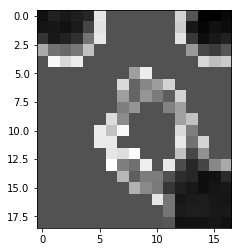

In [67]:
plt.imshow(ROI2, cmap='binary')

## Задача состоит в том чтобы обнаружить центр бронха. Пожалуй для начала нужно найти все пиксели !В! бронхе. Как это сделать? Может быть проверяя есть ли граница по краям не равная нулю? Если все соседи первой границы равны нулю, то расширить границу до второго уровня и проверять и расширять подобным образом удостоверившись что границы равны или не равны нулю.

## Я преполагаю что у нулевых пикселей вокруг есть пиксели не нулевого значения

## Для этого я создаю лист специально для пикселей равных нулю

In [88]:
list_of_candidates = []

### Извлек все ячейки равные нулям

In [90]:
ROI_size = ROI2.shape
for i in range(ROI_size[0]):
    for j in range(ROI_size[1]):
        if ROI2[i,j] == 0:
            list_of_candidates.append((i,j))

In [91]:
list_of_candidates

[(0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (4, 0),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 9),
 (8, 10),
 (8, 13),
 (8, 14),
 (8, 15),
 (8, 16),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 8),
 (9, 9),
 (9, 10),
 (9, 11),
 (9, 14),
 (9, 15),
 (9, 16),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (

In [94]:
for n in range(ROI.shape[0]):
    for k in range(ROI.shape[1]):
        a = (n,k)
        if a not in list_of_candidates:
            print(ROI[n,k])

249
181
217
197
167
-555
-483
-4
298
312
277
236
225
244
210
49
-539
-456
225
289
242
265
115
217
180
130
-129
-560
-543
96
263
218
178
-330
-122
-82
-142
-415
-265
45
83
-9
-624
-500
-582
-500
-402
-450
-289
-582
-506
-69
-196
-282
-482
-282
-68
-251
-151
-40
-482
-162
-248
-178
-286
-517
-215
-294
-417
-572
-428
-622
-510
-162
-569
-567
-561
-116
-487
-553
-524
-642
-417
42
-234
-650
-169
-112
-586
-560
24
163
53
-200
-325
-376
-42
-161
-157
6
141
166
255
240
148
-356
-205
-144
106
191
215
253
233
225
-556
-131
229
209
206
225
230
-131
209
199
201
218
221
-13
241
244
240
229
248
